# Regressão Logística

## Importando as Bibliotecas

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importando a Base de Dados

In [8]:
dados = pd.read_excel(r'train.xlsx')

In [9]:
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,712833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,2021-05-08 00:00:00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [ ]:
dados.Age = dados.Age.fillna(0)

In [10]:
dados.Age.unique()

array([22, 38, 26, 35, nan, 54, 2, 27, 14, 4, 58, 20, 39, 55, 31, 34, 15,
       28, 8, 19, 40, 66, 42, 21, 18, 3, 7, 49, 29, 65,
       datetime.datetime(2021, 5, 28, 0, 0), 5, 11, 45, 17, 32, 16, 25,
       '0.83', 30, 33, 23, 24, 46, 59, 71, 37, 47,
       datetime.datetime(2021, 5, 14, 0, 0), '70.5', '32.5', 12, 9,
       '36.5', 51, '55.5', '40.5', 44, 1, 61, 56, 50, 36, '45.5',
       datetime.datetime(2021, 5, 20, 0, 0), 62, 41, 52, 63,
       datetime.datetime(2021, 5, 23, 0, 0), '0.92', 43, 60, 10, 64, 13,
       48, '0.75', 53, 57, 80, 70, datetime.datetime(2021, 5, 24, 0, 0),
       6, '0.67', datetime.datetime(2021, 5, 30, 0, 0), '0.42', '34.5',
       74], dtype=object)

In [12]:
for i in dados.index:
    if isinstance(dados.Age[i], (int, float,str)) == False:
        dados.loc[i, "Age"] = 0

    elif isinstance(dados.Age[i], (str)) == True:
        dados.Age[i] = float(dados.Age[i]) 


In [13]:
dados.Age.unique()

array([22, 38, 26, 35, nan, 54, 2, 27, 14, 4, 58, 20, 39, 55, 31, 34, 15,
       28, 8, 19, 40, 66, 42, 21, 18, 3, 7, 49, 29, 65, 0, 5, 11, 45, 17,
       32, 16, 25, 0.83, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70.5, 32.5,
       12, 9, 36.5, 51, 55.5, 40.5, 44, 1, 61, 56, 50, 36, 45.5, 62, 41,
       52, 63, 0.92, 43, 60, 10, 64, 13, 48, 0.75, 53, 57, 80, 70, 6,
       0.67, 0.42, 34.5, 74], dtype=object)

In [15]:
for i in dados.index:
    if isinstance(dados.Fare[i], (str)) == False:
        if isinstance(dados.Fare[i], (float, int)) == False:
            dados.Fare[i] = 0
        else:
            pass
    else:
        dados.loc[i, "Fare"] = float(dados.loc[i, "Fare"])


In [16]:
dados.Cabin = dados.Cabin.fillna('n_identificado')

In [17]:
dados.Embarked = dados.Embarked.fillna('n_identificado')

In [18]:
dados = dados.drop(['Ticket','PassengerId'], axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

colunas = pd.DataFrame(dados.dtypes).reset_index().rename(columns={'index': 'nome', 0: 'tipo'})
categ_cols = colunas[colunas.tipo  == 'object']



for i in categ_cols.index:
    dados[str(categ_cols['nome'][i]) + '_encoded'] = le.fit_transform(dados[categ_cols['nome'][i]])
    dados = dados.drop(categ_cols['nome'][i], axis = 1)

## Separando a Base em Treino e Teste

In [20]:
from sklearn.model_selection import train_test_split

x = dados.drop('Survived', axis = 1)
y = dados.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Padronização dos Dados

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Treinando o Modelo

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Prevendo o Resultado do Conjunto de Teste

In [23]:
y_pred = classifier.predict(x_test)

## Matriz de Confusão

In [24]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7947761194029851


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Na Matriz de Confusão, o primeiro argumento dado para a função fica no eixo y, e o segundo argumento no eixo x

Portando para o nosso exemplo, os valores reais ficam na vertical, e os previstos na horizontal

In [26]:
len(x_test)

268

<Axes: >

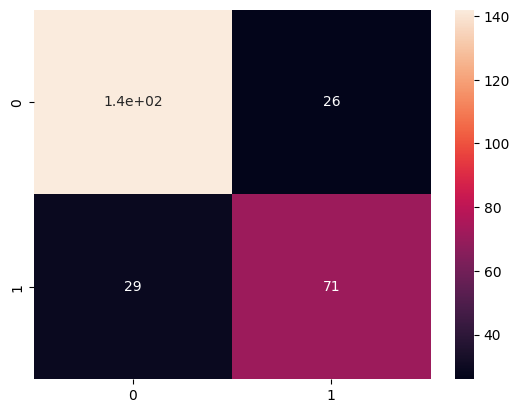

In [27]:
import seaborn as sns

sns.heatmap(cm, annot=True)



```
# Isto está formatado como código
```

## Curva ROC

Text(0.5, 1.0, 'Curva ROC')

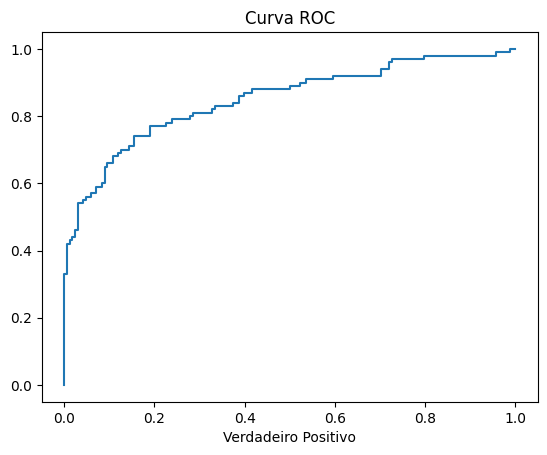

In [28]:
from sklearn.metrics import roc_curve
prob = classifier.predict_proba(x_test)
prob = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, prob)

plt.plot(fpr, tpr)
plt.xlabel('Falso Positivo')
plt.xlabel('Verdadeiro Positivo')
plt.title('Curva ROC')

## Precision e Recall

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7319587628865979
0.71
0.7208121827411168
